# Importing Key Libraries

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder

# Using pandas to preprocess the data

In [123]:
data = pd.read_csv("../datasets/mnist_train_small.csv")

# Checking the Shape of data

In [124]:
data.shape

(8000, 786)

In [125]:
data.head()

,Unnamed: 0,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
num = data.values  #converting data into numpy array

In [127]:
# Extracting usefull information:-

X = num[:, 2:]
y = num[:, 1]       

In [128]:
#Visualizing MNIST data
img = X[2].reshape(28, 28)

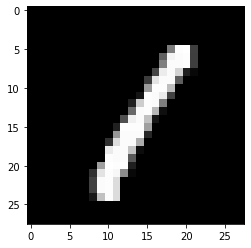

In [129]:
plt.imshow(img, cmap="gray")

In [130]:
#Spliting the data into seperate training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Applying KNN without PCA

In [131]:
#create instance of the KNeighborsClassifier class

model = KNeighborsClassifier(4)

In [132]:
# Fitting the Model over Dataset

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9462121212121212


# Applying KNN with PCA

In [133]:
# Applying features reduction using PCA

pca = PCA(n_components=75)
X_mode_train = pca.fit_transform(X_train)
X_mode_test = pca.transform(X_test)

In [96]:
X_mode_train.shape

(5360, 75)

In [97]:
#Explained Variance

pca.explained_variance_

array([355349.70600089, 246702.24269207, 210796.87012554, 183424.9135475 ,
       164056.76066786, 153124.30524024, 113794.12617733,  99125.79375221,
        93202.30754354,  79617.95964258,  72683.79630954,  68979.92209075,
        58250.1359679 ,  57128.40930442,  55563.3236549 ,  51668.97805282,
        44082.68182067,  43261.71682089,  40177.19273524,  38752.74225574,
        35029.50048333,  34319.97656614,  32338.15137799,  31016.76444732,
        29461.24790761,  28734.6633215 ,  27049.65083708,  26180.32915369,
        25112.00552151,  23739.97615706,  22497.27461473,  21453.49467781,
        20445.85900864,  20199.33493347,  18960.64916062,  18325.09500095,
        17568.09610074,  16521.8609042 ,  16159.05216798,  15597.69027088,
        15157.51191466,  14730.56522576,  14021.84513879,  13502.43834718,
        13045.73878859,  12360.56704922,  12055.58844536,  11617.10490884,
        11392.34556285,  11202.68362252,  10896.83126865,  10578.17339439,
        10193.88164317,  

## Applying KNN Classifier

In [134]:
#create instance of the KNeighborsClassifier class

model = KNeighborsClassifier(4)

In [99]:
model.fit(X_mode_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [100]:
test_acc=model.score(X_mode_test, y_test)

In [101]:
print(test_acc)

0.9522727272727273


In [1]:
# Result :
#Without PCA- accuracy - 94.6
#With PCA - 95.2